## p1

### 1.1
True


### 1.2
C


### 1.3
B,C,B

## P2


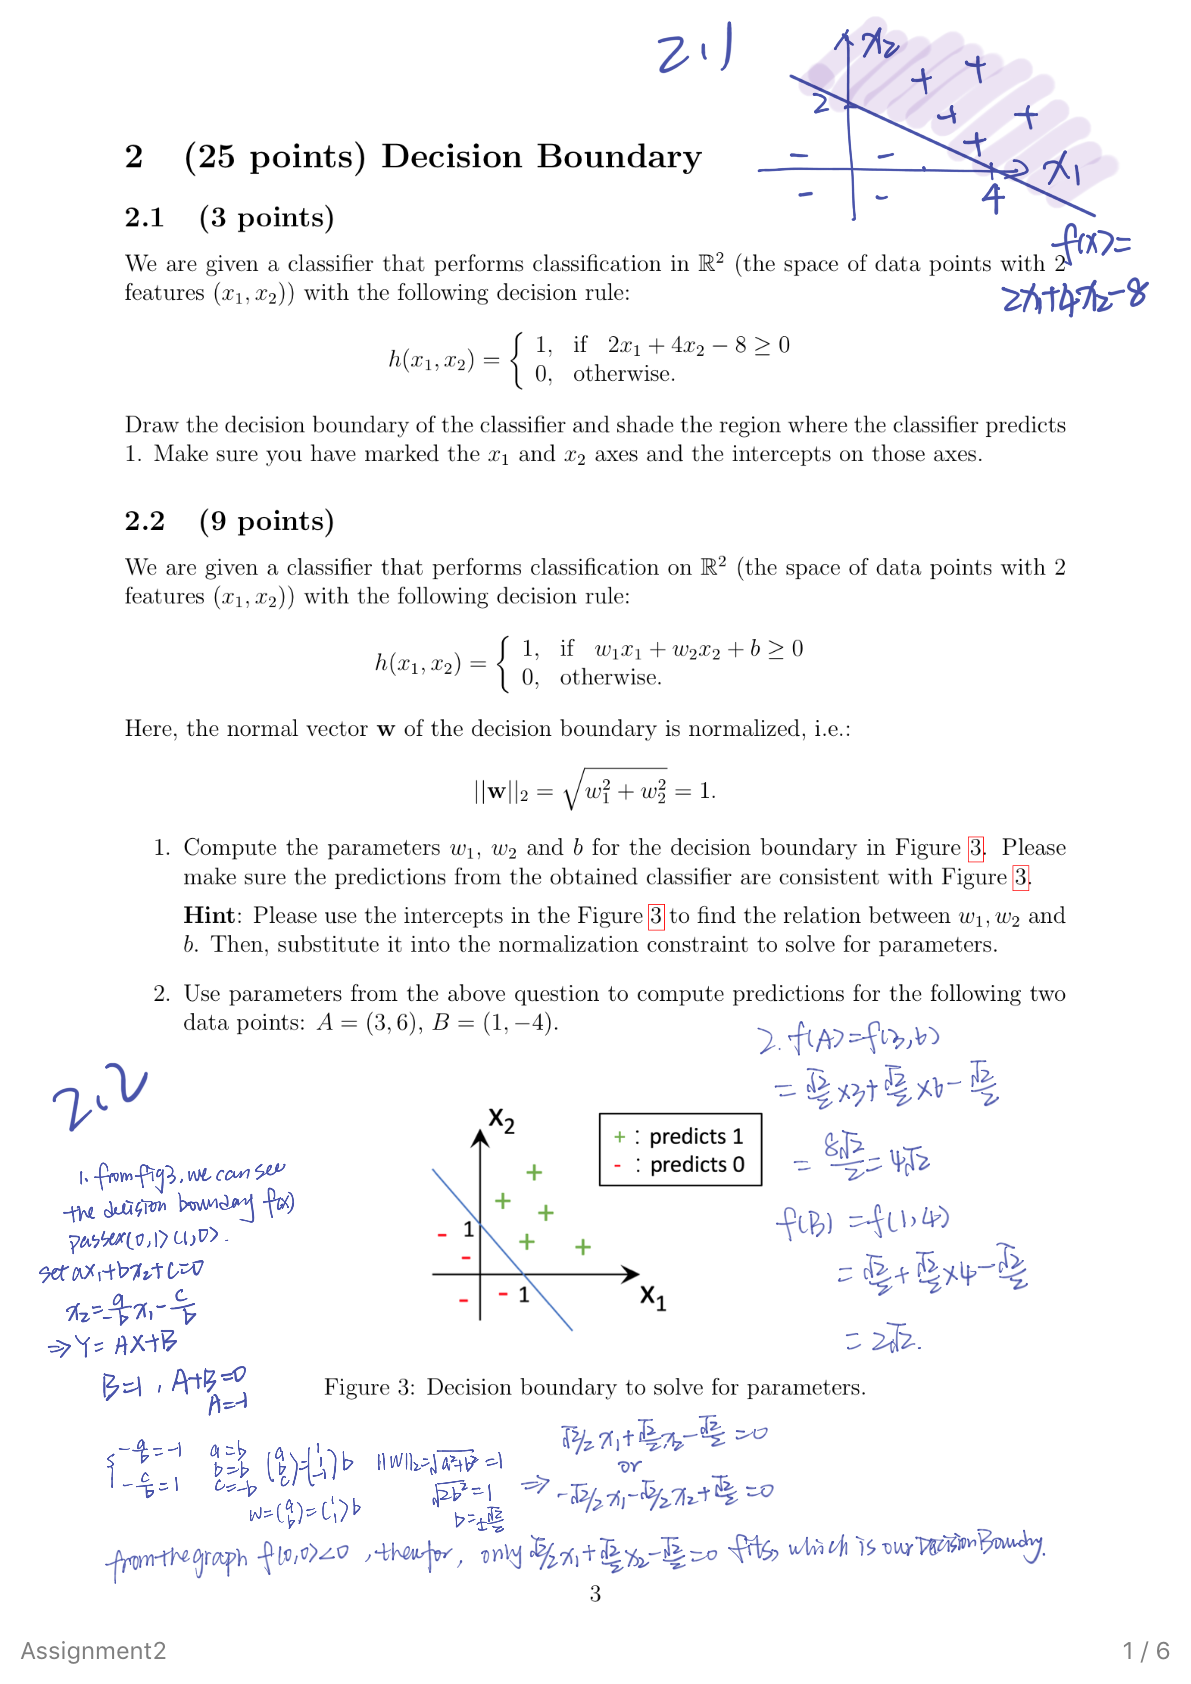

In [8]:
from IPython.display import Image
Image('P1.png')

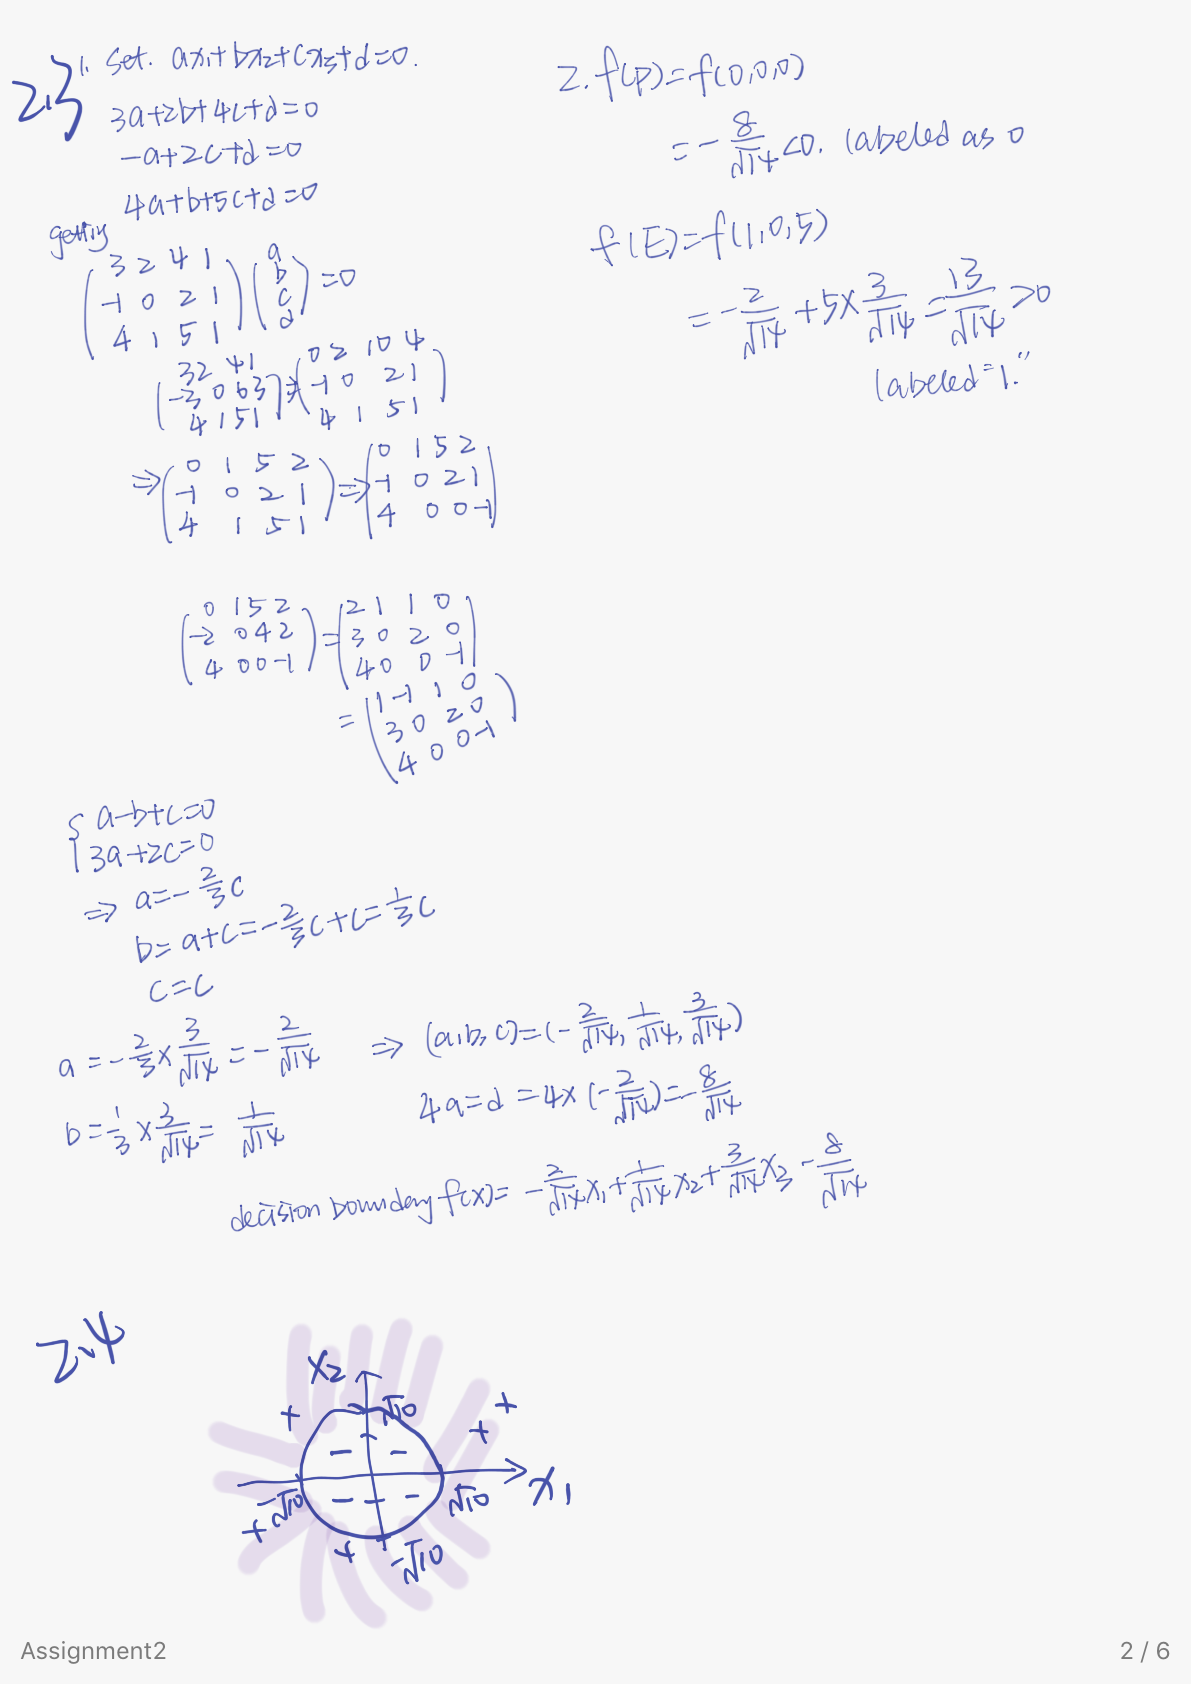

In [9]:
Image('P2.png')

## P3

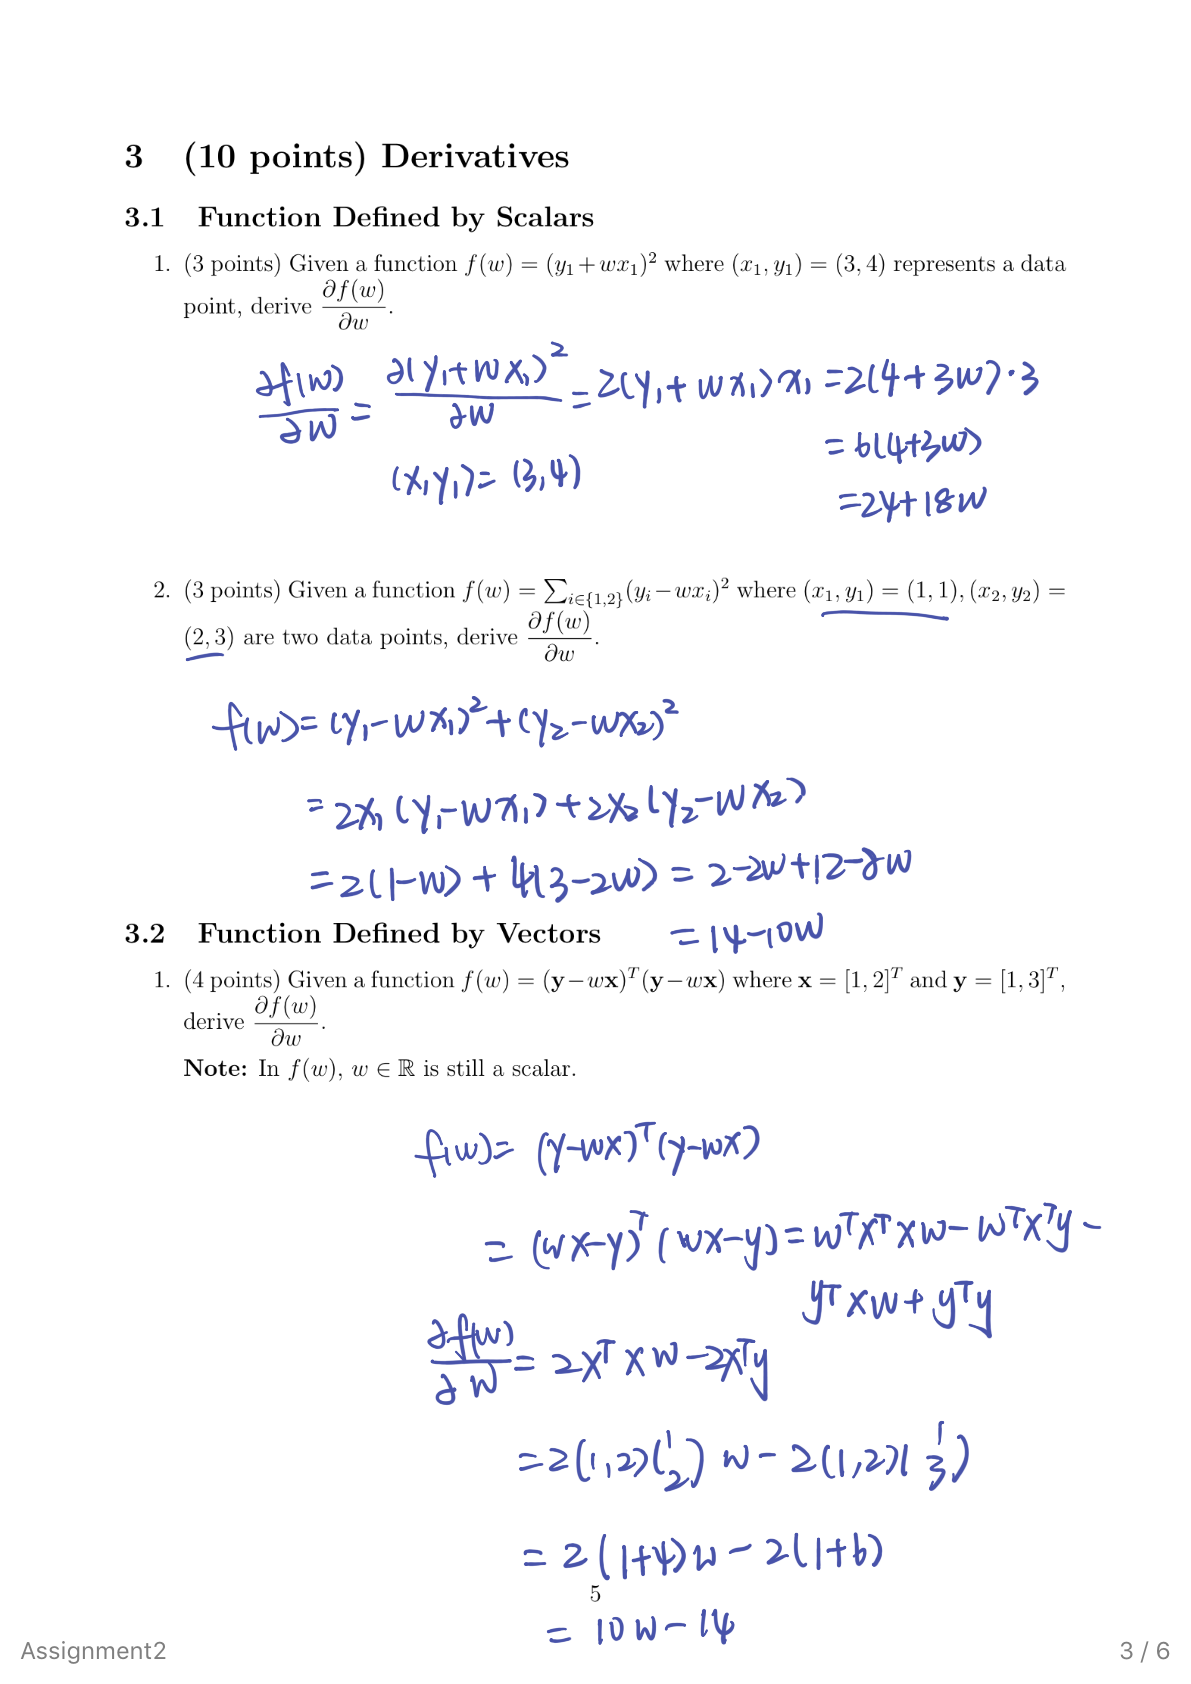

In [10]:
Image('P3.png')

## P4

### 1
AD

### 2
A

### 3
B

## P5 Argmin and Argmax

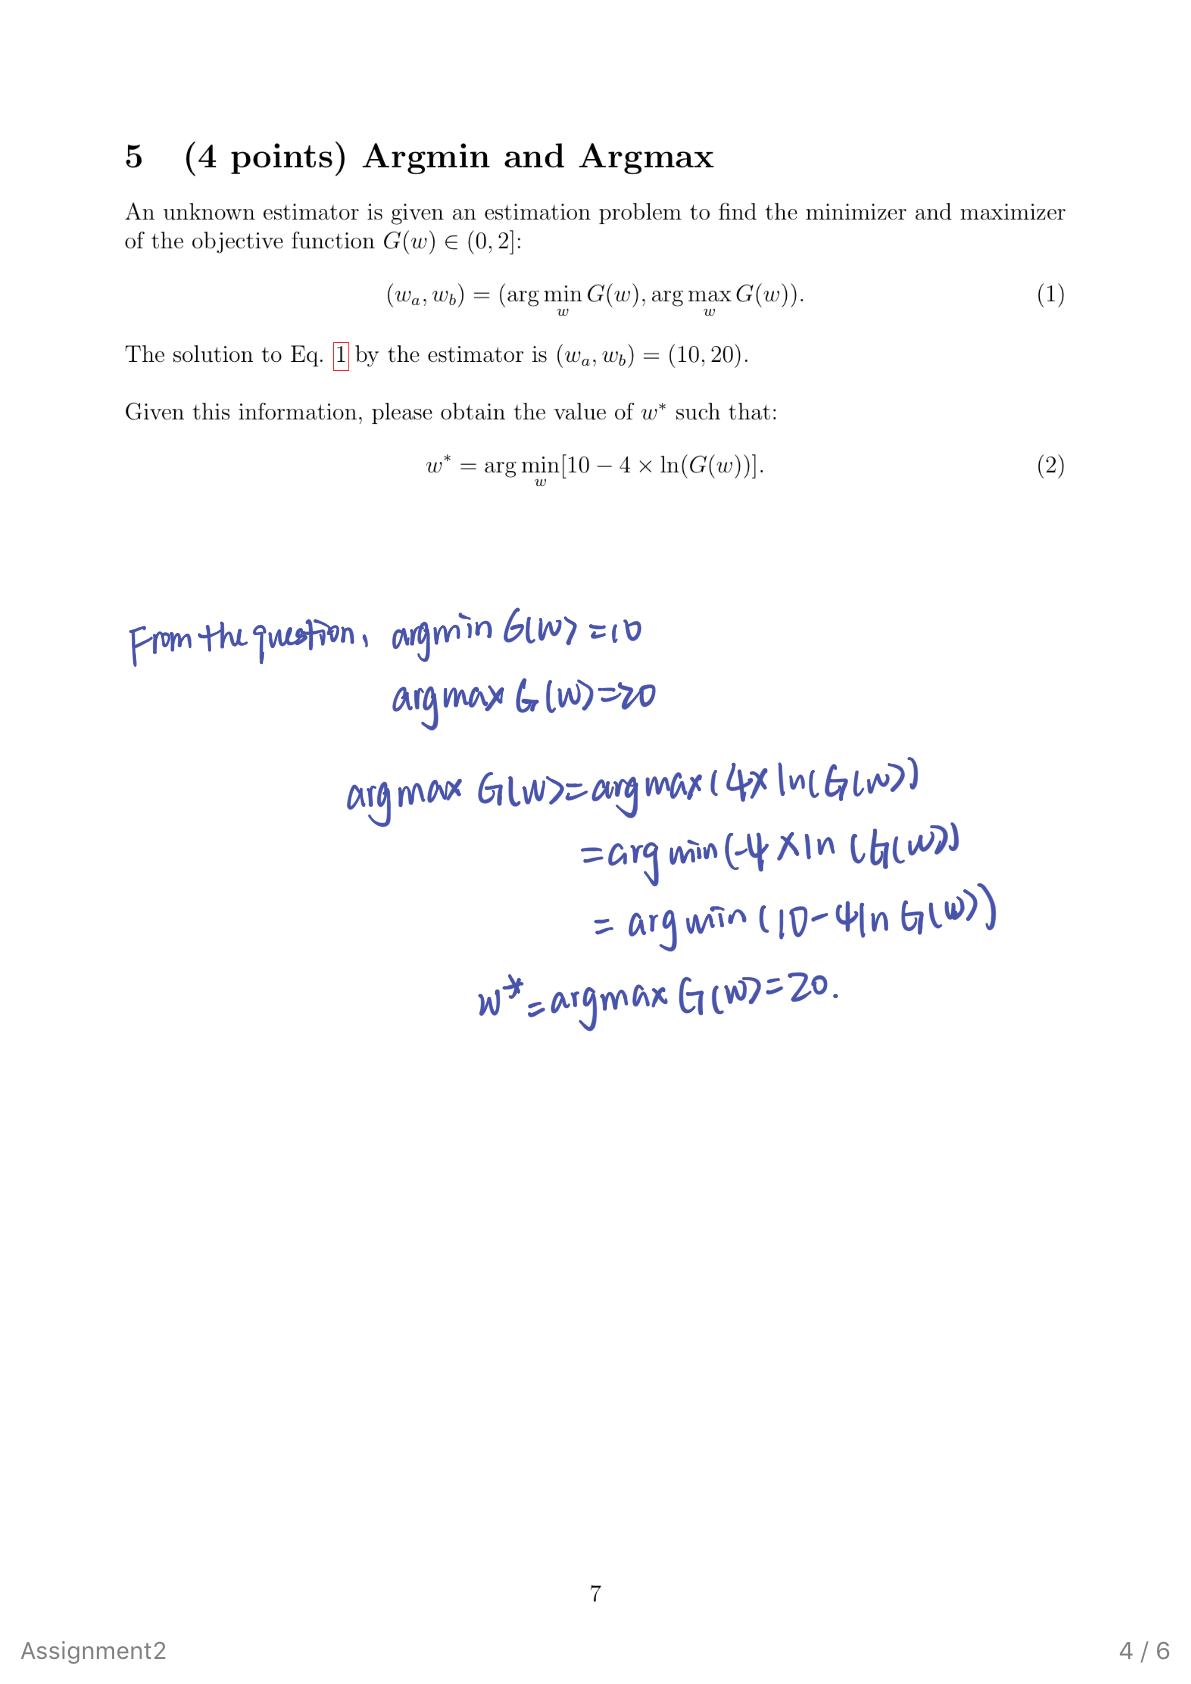

In [11]:
Image('P4.png')

## P6  Data Manipulation

In [12]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

NameError: name 'datasets' is not defined

In [9]:
X.shape


(150, 4)

### 1.  Divide array X evenly to five subsets of data points:
    - Group 1:  1st to 30th data point,
    - Group 2:  31st to 60th data point,
    - Group 3:  61st to 90th data point,
    - Group 4:  91st to 120th data point,
    - Group 5:  121st to 150th data point.

Then calculate the mean of feature vectors in each group.  Your results should be five4-dimensional vectors (i.e.  shape ofNumPyarray can be(4,1),(1,4)or(4,)).


In [26]:
group1, group2, group3, group4, group5= np.split(X, 5)


In [37]:
for i in range(1,6):
    group=np.split(X, 5)[i-1]
    mean_each=group.mean(0)
    print ('mean of group' +str(i)+' :  '+ str(mean_each))
    print ('the shape of group'+ str(i) +' is: ' + str(mean_each.shape))
    print (' ')


mean of group1 :  [5.02666667 3.45       1.47333333 0.24666667]
the shape of group1 is: (4,)
 
mean of group2 :  [5.35       3.22       2.42       0.62333333]
the shape of group2 is: (4,)
 
mean of group3 :  [5.98 2.75 4.3  1.34]
the shape of group3 is: (4,)
 
mean of group4 :  [6.25333333 2.85666667 5.11333333 1.77333333]
the shape of group4 is: (4,)
 
mean of group5 :  [6.60666667 3.01       5.48333333 2.01333333]
the shape of group5 is: (4,)
 


### 2.  Remove 2nd and 3rd features from arrayX, resulting a 150×2 matrix.  Then calculatethe mean of all feature vectors.  Your result should be a 2-dimensional vector.

In [32]:
new_array= np.delete(X, [1,2],1)
print('the shape of new array is: ' +str(new_array.shape))
mean_all= new_array.mean(0)
print('the mean of all feature vectors is: ' + str(mean_all))
print('the shape of the mean of all feature vectors is: ' +str(mean_all.shape))

the shape of new array is: (150, 2)
the mean of all feature vectors is: [5.84333333 1.19933333]
the shape of the mean of all feature vectors is: (2,)


### 3.  Remove last 10 data points from arrayX, resulting a 140×4 matrix.  Then calculatethe mean of feature vectors.  Your result should be a 4-dimensional vector.

In [40]:
X_3=np.delete(X, np.s_[140:], 0)
print('The shape of this new array is: '+ str( X_3.shape))
mean_3= X_3.mean(0)
print('The mean of feature vectors is: '+ str(mean_3))
print(' The shape of this mean vector is: '+ str(mean_3.shape))

The shape of this new array is: (140, 4)
The mean of feature vectors is: [5.8        3.05928571 3.64571429 1.13      ]
 The shape of this mean vector is: (4,)


## P7. Training vs Testing Errors

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Load the Iris dataset

In [42]:
# Iris dataset.
iris = datasets.load_iris()     # Load Iris dataset.

X = iris.data                   # The shape of X is (150, 4), which means
                                # there are 150 data points, each data point
                                # has 4 features.

# Here for convenience, we divide the 3 kinds of flowers into 2 groups: 
#     Y = 0 (or False):  Setosa (original value 0) / Versicolor (original value 1)
#     Y = 1 (or True):   Virginica (original value 2)

# Thus we use (iris.target > 1.5) to divide the targets into 2 groups. 
# This line of code will assign:
#    Y[i] = True  (which is equivalent to 1) if iris.target[k]  > 1.5 (Virginica)
#    Y[i] = False (which is equivalent to 0) if iris.target[k] <= 1.5 (Setosa / Versicolor)

Y = (iris.target > 1.5).reshape(-1,1) # The shape of Y is (150, 1), which means 
                                # there are 150 data points, each data point
                                # has 1 target value. 

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])               # The result should be always: [ 5.8  4.   1.2  0.2  0. ]

(150, 4)
(150, 1)
[5.8 4.  1.2 0.2 0. ]


In [3]:
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:4]
Y_shuffled = X_and_Y[:,4]

X_train = X_shuffled[:100] # Shape: (100,4)
Y_train = Y_shuffled[:100] # Shape: (100,)
X_test = X_shuffled[100:]  # Shape: (50,4)
Y_test = Y_shuffled[100:]  # Shape: (50,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [43]:
from sklearn.linear_model import LinearRegression 

# let's train a LR model...
# note that this time we let sklearn fit the intercept
# ask yourself why. Ask yourself what could we have done
# to X_and_Y so that we could have used
# = LinearRegression(fit_intercept=False).fit(X_train, Y_train)
# instead of the below line, and got identical results?
pre_defined_weights = LinearRegression().fit(X_train, Y_train)
w = pre_defined_weights.coef_
b = pre_defined_weights.intercept_

In [47]:
def regression_error(x, y, w, b):
    
    reg_err = 0
    for i in range(len(x)):
        # TODO: ******** To be filled ********
        
        # prediction based on x 
        y_hat = np.dot(w, x[i,:]) + b
        # regression error, doing the sum 
        reg_err += (y_hat - y[i]) ** 2
    # calculate the mean and square root 
    reg_err_mean= reg_err/len(x)
    reg_err_sqrt= np.sqrt(reg_err_mean)
    regression_error=reg_err_sqrt
    return regression_error

def classification_error(x, y, w, b):
    class_err = 0
    
    for i in range(len(x)):
        # TODO: ******** To be filled ********
        
        # prediction based on x
        y_hat = np.dot(w, x[i,:]) + b
        
        # classification error
        y_hat_bi = 1 if y_hat >= 0.5 else 0
        class_err += (y_hat_bi != y[i])
    # calculate the mean of error 
    class_err_mean= class_err/len(x)
    classification_error= class_err_mean
    return classification_error
    
print('Training regression errors are:')
print(regression_error(X_train, Y_train, w, b))
print('Testing regression errors are:')
print(regression_error(X_test, Y_test, w, b))

print('Training classification errors are:')
print(classification_error(X_train, Y_train, w, b))
print('Testing classification errors are:')
print(classification_error(X_test, Y_test, w, b))

Training regression errors are:
0.27920692706242634
Testing regression errors are:
0.3304662349223522
Training classification errors are:
0.06
Testing classification errors are:
0.14


## P8 Linear Regression

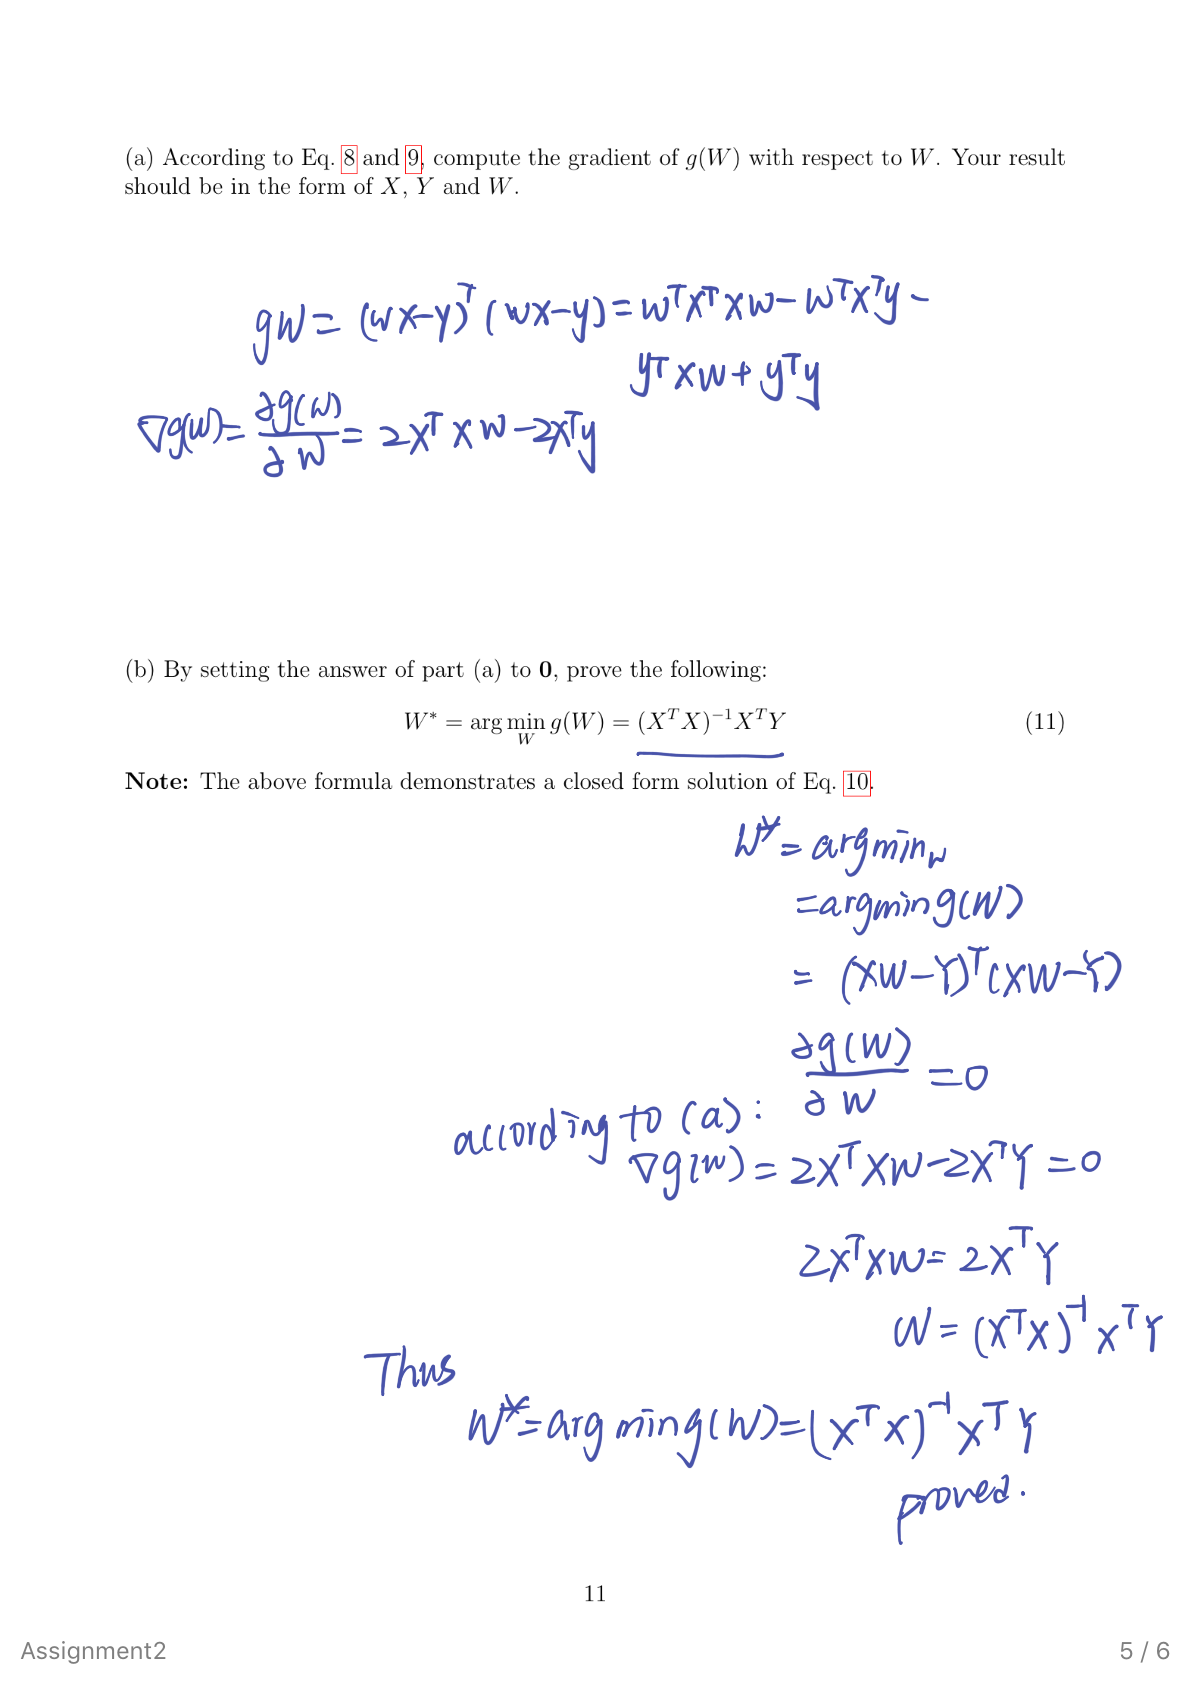

In [6]:
Image('P5.png')

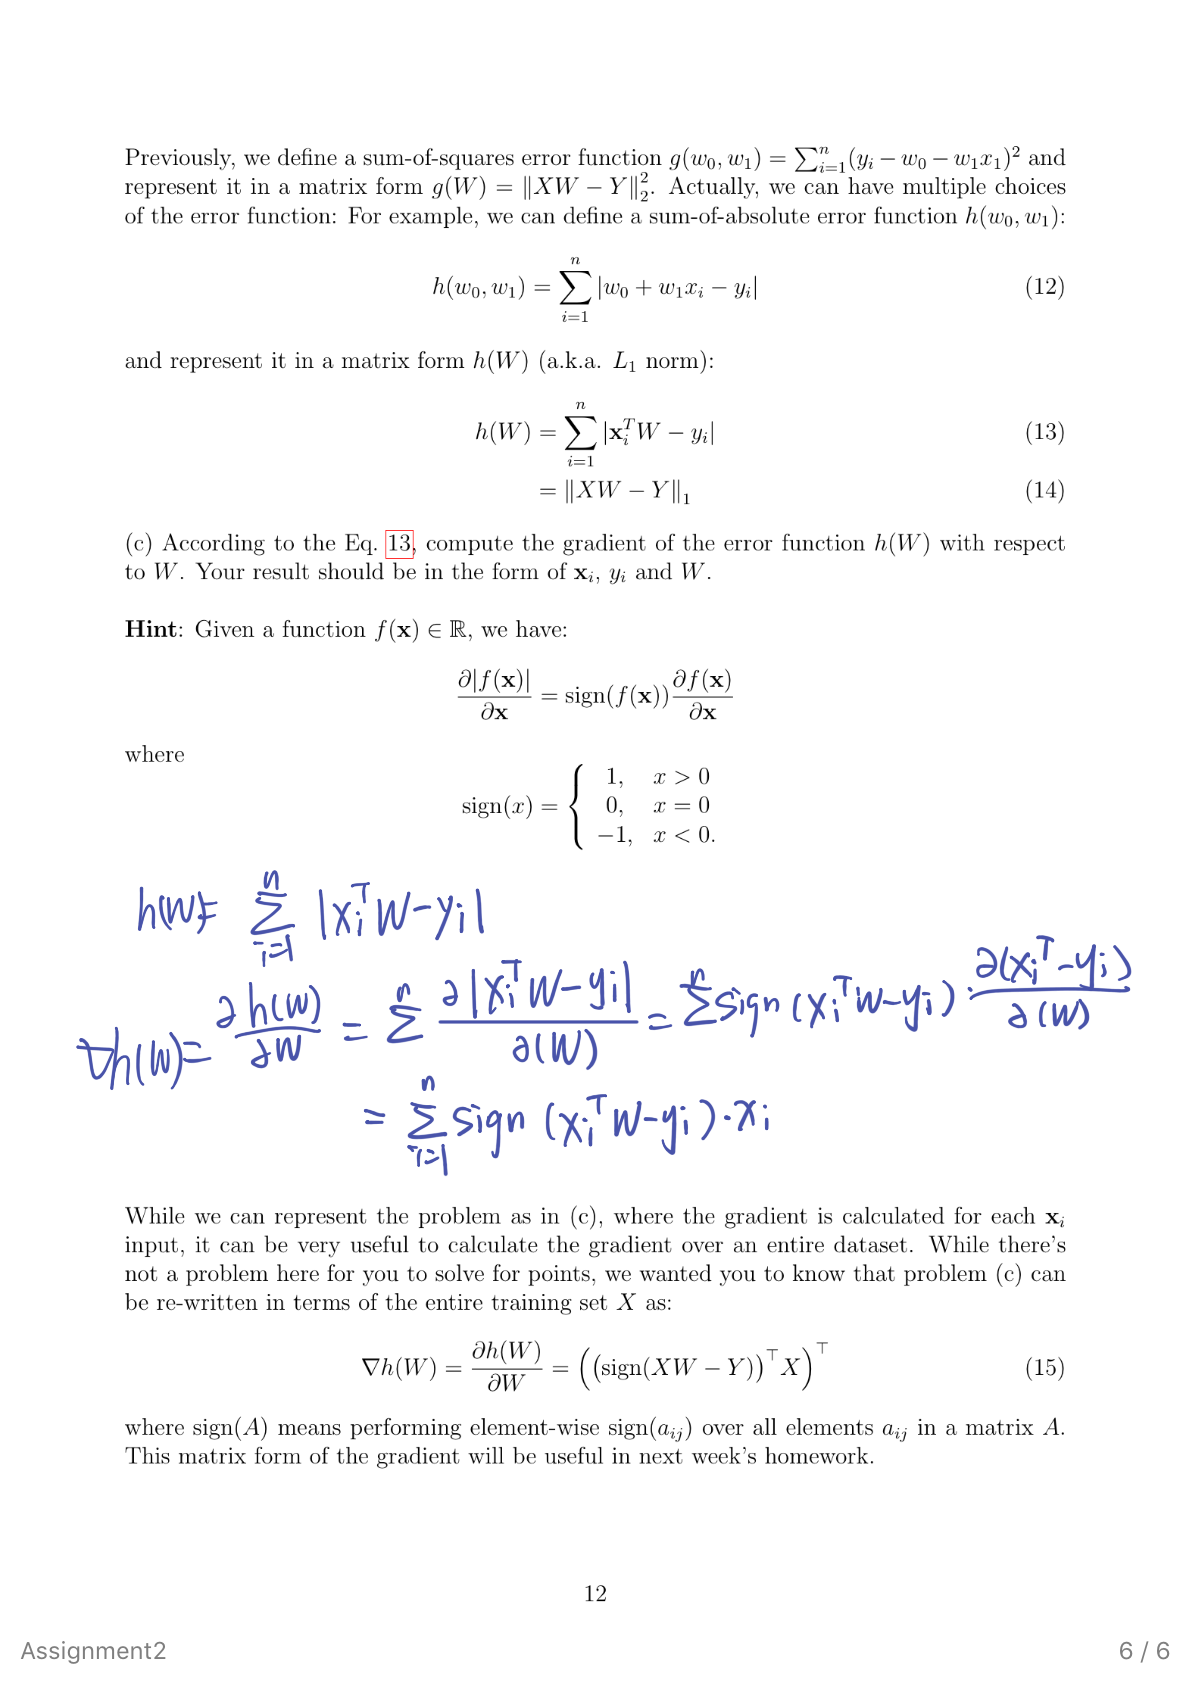

In [7]:
Image('P6.png')